# INFO 7374 Machine Learning in Finance
# Garch Model 

## Installing the datareader


In [1]:
!pip install pandas_datareader

## Importing all the requried libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from datetime import datetime
import datetime
import math
import scipy.stats as ss
import seaborn as sns; sns.set(color_codes=True)
from math import sqrt
from sklearn.metrics import mean_squared_error

import scipy.optimize as opt

# extract data from various Internet sources into a pandas DataFrame
import pandas_datareader as web

In [8]:
start = datetime.datetime(2014, 1, 1)
end = datetime.datetime(2020, 12, 31)
df_pfe = web.DataReader('PFE', 'yahoo', start, end) 
df_mrna = web.DataReader('MRNA', 'yahoo', start, end) 
mrna=df_mrna
pfe= df_pfe
pfe=pfe.reset_index()
pfe['Date'] = pd.to_datetime(pfe['Date'])
# corresponding csv file is saved in an ouput directory 
#df_pfe.to_csv('data/data.csv')
pfe 

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-01-02,29.032257,28.776091,28.908918,28.899431,18366266.0,22.159529
1,2014-01-03,29.250475,28.823528,28.833017,28.956356,15847312.0,22.203180
2,2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004
3,2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232
4,2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999
...,...,...,...,...,...,...,...
1758,2020-12-24,37.570000,37.180000,37.400002,37.270000,14790100.0,36.868916
1759,2020-12-28,37.580002,36.680000,37.360001,36.820000,26993700.0,36.423756
1760,2020-12-29,37.200001,36.790001,36.900002,37.049999,23152100.0,36.651279
1761,2020-12-30,37.240002,36.700001,37.029999,36.740002,24889800.0,36.344620


In [9]:
pfe.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
pfe.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1763.000000,1763.000000,1763.000000,1763.000000,1.763000e+03,1763.000000
mean,33.740146,33.177346,33.469125,33.458512,2.760071e+07,29.339033
std,3.808556,3.731121,3.772220,3.771407,1.553666e+07,5.030415
min,26.537003,26.100569,26.385199,26.280834,5.187683e+06,20.681654
25%,31.057875,30.531309,30.811195,30.792220,1.918101e+07,25.629416
50%,33.197342,32.647060,32.941177,32.941177,2.409960e+07,28.001856
75%,35.555029,34.990513,35.308348,35.294117,3.175043e+07,33.669758
max,44.089184,43.415562,43.994308,43.861481,2.998294e+08,42.101986


In [11]:
mrna.describe()

,High,Low,Open,Close,Volume,Adj Close
count,521.000000,521.000000,521.000000,521.000000,5.210000e+02,521.000000
mean,41.069411,38.157004,39.767374,39.620988,9.782136e+06,39.620988
std,33.738925,30.947967,32.600969,32.332400,1.525393e+07,32.332400
min,12.690000,11.540000,12.260000,12.260000,2.728000e+05,12.260000
25%,17.608000,16.709999,17.250000,17.049999,1.112800e+06,17.049999
50%,22.768000,21.160000,22.100000,21.830000,3.044600e+06,21.830000
75%,65.879997,61.799999,63.790001,64.209999,1.251530e+07,64.209999
max,178.500000,164.300003,177.660004,169.860001,1.255523e+08,169.860001


In Stock trading, the **high**, **low** refers to the maximum and the minimum prices in a given time period. **Open** and **Close** are thhighLowOpenClosee prices at which a stock began and ended trading in the same period. **Volume** is the total amount of trading activity. Adjusted values factor in corporate actions such as dividends, stock splits, and new share issuance.

In [12]:
pfe['Typical_Price'] = pfe[['High','Low','Close']].mean(axis=1)
pfe['lrets'] = (np.log(pfe.Close) - np.log(pfe.Close.shift(1))) * 100.
pfe.head()

,Date,High,Low,Open,Close,Volume,Adj Close,Typical_Price,lrets
0,2014-01-02,29.032257,28.776091,28.908918,28.899431,18366266.0,22.159529,28.902593,NaN
1,2014-01-03,29.250475,28.823528,28.833017,28.956356,15847312.0,22.203180,29.010120,0.196782
2,2014-01-06,29.364326,28.965843,29.193548,28.984819,25255421.0,22.225004,29.104996,0.098249
3,2014-01-07,29.430740,29.165085,29.278936,29.165085,23423042.0,22.363232,29.253637,0.620004
4,2014-01-08,29.402277,29.079697,29.203035,29.364326,24161053.0,22.515999,29.282100,0.680828


In [13]:

mrna['lrets'] = (np.log(mrna.Close) - np.log(mrna.Close.shift(1))) * 100.
mrna.head()

,High,Low,Open,Close,Volume,Adj Close,lrets
Date,,,,,,,
2018-12-07,22.750000,18.51,22.000000,18.600000,12995600,18.600000,NaN
2018-12-10,19.438999,18.00,18.900000,18.799999,4233300,18.799999,1.069523
2018-12-11,20.660000,17.99,20.549999,18.010000,3435300,18.010000,-4.292966
2018-12-12,19.480000,18.02,18.549999,18.680000,2590700,18.680000,3.652628
2018-12-13,19.290001,18.68,19.250000,18.760000,1608600,18.760000,0.427351


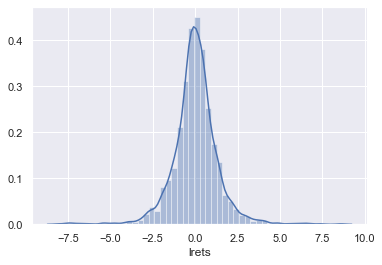

In [14]:
sns.distplot(pfe['lrets'].dropna())

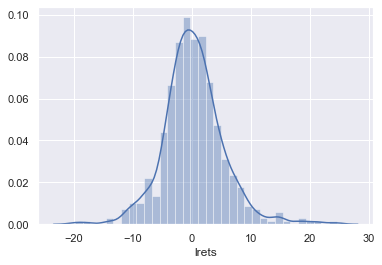

In [15]:
sns.distplot(mrna['lrets'].dropna())

In [16]:
def GARCH(Y):
    "Initialize Params:"
    mu = param0[0]
    omega = param0[1]
    alpha = param0[2]
    beta = param0[3]
    T = Y.shape[0]
    GARCH_Dens = np.zeros(T) 
    sigma2 = np.zeros(T)   
    F = np.zeros(T)   
    v = np.zeros(T)   
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
        F[t] = Y[t] - mu-np.sqrt(sigma2[t])*np.random.normal(0,1,1)
        v[t] = sigma2[t]
        GARCH_Dens[t] = (1/2)*np.log(2*np.pi)+(1/2)*np.log(v[t])+(1/2)*(F[t]/v[t])     
        Likelihood = np.sum(GARCH_Dens[1:-1])  
    return Likelihood

In [17]:
def GARCH_Prod(params, Y0, T):
    mu = params[0]
    omega = params[1]
    alpha = params[2]
    beta = params[3]
    Y = np.zeros(T)  
    sigma2 = np.zeros(T)
    Y[0] = Y0
    sigma2[0] = 0.0001
    for t in range(1,T):
        sigma2[t] = omega + alpha*((Y[t-1]-mu)**2)+beta*(sigma2[t-1]); 
        Y[t] = mu+np.sqrt(sigma2[t])*np.random.normal(0,1,1)    
    return Y

F:\anaconda\lib\site-packages\ipykernel_launcher.py:5: OptimizeWarning: Unknown solver options: xtol
  """


         Current function value: 2.302846
         Iterations: 4
         Function evaluations: 248
         Gradient evaluations: 37


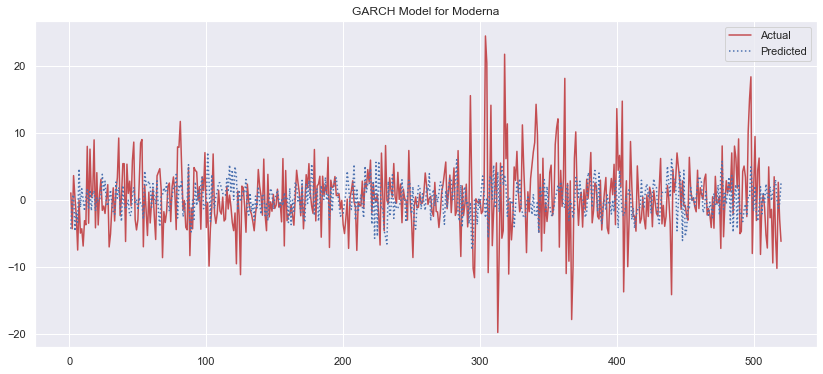

In [18]:
Y = mrna['lrets'].dropna()
T=len(Y)

param0=np.array([0.124,1.88,0.2,0.5])
param_star=opt.minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})

Y_GARCH=GARCH_Prod(param_star.x,Y[1],T)
timevec=np.linspace(1,T,T)

fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')

plt.legend(loc='upper right')
plt.title("GARCH Model for Moderna")
plt.show()

In [19]:
dif_mrna = pd.DataFrame({'Actual':list(Y),
                     'Predicted':list(Y_GARCH)})
dif_mrna

,Actual,Predicted
0,1.069523,-4.292966
1,-4.292966,0.265708
2,3.652628,0.802464
3,0.427351,-4.621107
4,-2.373361,-1.732948
...,...,...
515,-5.479633,3.032268
516,-10.222272,0.073282
517,2.648632,-1.205249
518,-2.891299,-0.504797


In [20]:
rms_mrna = sqrt(mean_squared_error(dif['Actual'],dif['Predicted']))
rms_mrna

NameError: name 'dif' is not defined

F:\anaconda\lib\site-packages\ipykernel_launcher.py:6: OptimizeWarning: Unknown solver options: xtol
  


         Current function value: 2.227506
         Iterations: 1
         Function evaluations: 126
         Gradient evaluations: 19


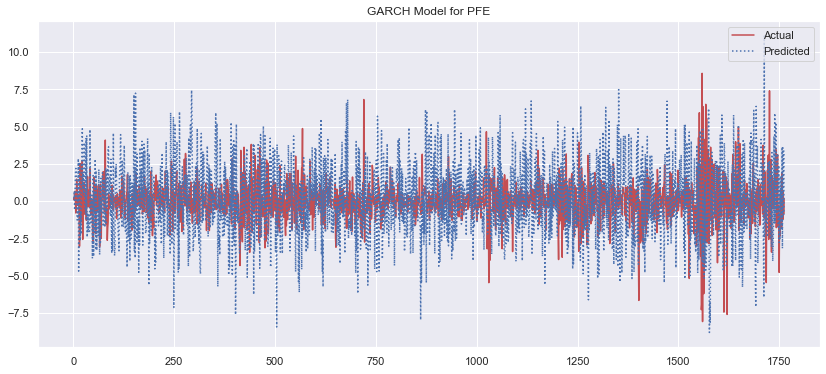

In [22]:
Y = pfe['lrets'].dropna()
T=len(Y)

#Y=np.random.normal(mu,sig,T)
param0=np.array([0.124,1.88,0.2,0.5])
param_star=opt.minimize(GARCH,param0, method ='BFGS' , options = {'xtol' : 1e-8, 'disp' : True})
Y_GARCH=GARCH_Prod(param_star.x,Y[1],T)
timevec=np.linspace(1,T,T)

fig= plt.figure(figsize=(14,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')

plt.legend(loc='upper right')
plt.title("GARCH Model for PFE")
plt.show()

In [23]:
dif = pd.DataFrame({'Actual':list(Y),
                     'Predicted':list(Y_GARCH)})

In [24]:
dif

,Actual,Predicted
0,0.196782,0.196782
1,0.098249,0.696336
2,0.620004,-0.586118
3,0.680828,0.627056
4,-0.064644,1.869833
...,...,...
1757,-0.455089,-3.141609
1758,-1.214756,3.594115
1759,0.622716,3.340782
1760,-0.840221,-0.889316


In [25]:
dif.head()

,Actual,Predicted
0,0.196782,0.196782
1,0.098249,0.696336
2,0.620004,-0.586118
3,0.680828,0.627056
4,-0.064644,1.869833


In [26]:
rms = sqrt(mean_squared_error(dif['Actual'],dif['Predicted']))
rms

2.869634243485617

In [27]:
y_pred = [] * 1000

for i in range(len(dif)+1):
    if i == 0:
        y_pred.append(636.989990)
    else:
        y_pred.append(math.exp(dif['Predicted'][i-1]/100) * y_pred[i-1])

In [29]:

Predicted = pd.DataFrame({'Actual_Close_Price':pfe.Close,
                     'Predicted_Close_Price':list(y_pred),
                         'Date': pfe.Date})
Predicted.set_index('Date')

,Actual_Close_Price,Predicted_Close_Price
Date,,
2014-01-02,28.899431,636.989990
2014-01-03,28.956356,638.244705
2014-01-06,28.984819,642.704544
2014-01-07,29.165085,638.948552
2014-01-08,29.364326,642.967708
...,...,...
2020-12-24,37.270000,7956.750722
2020-12-28,36.820000,8247.926778
2020-12-29,37.049999,8528.126438



### Checking Return Volatility with Actual and Predicted Values¶

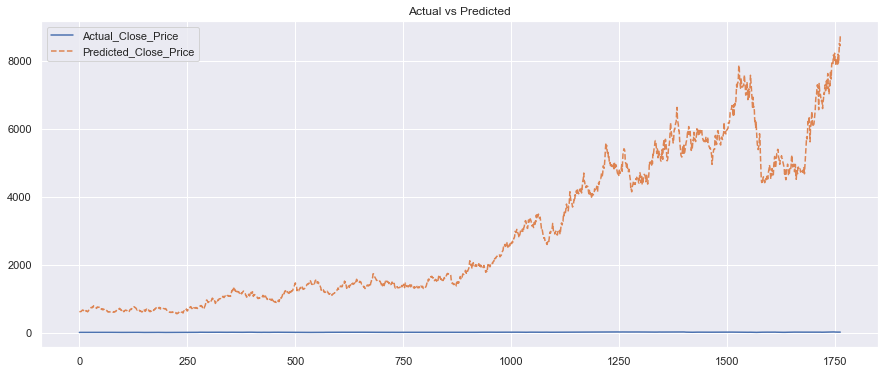

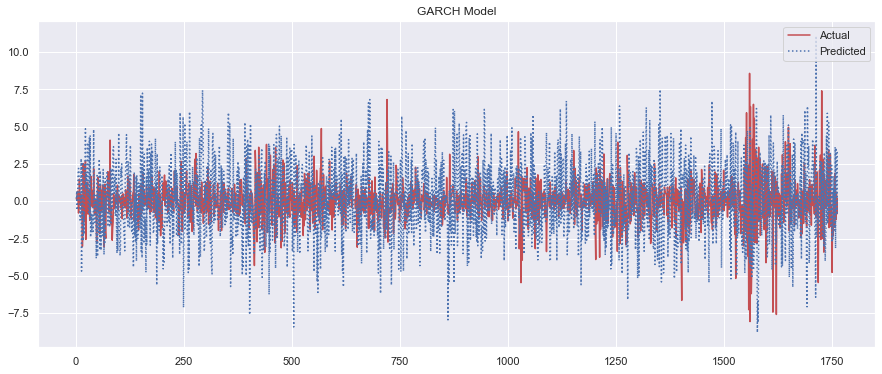

In [30]:
Predicted[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,6), style=['-','--'], 
                                                                    title = 'Actual vs Predicted')
fig= plt.figure(figsize=(15,6))
plt.plot(timevec, Y,'r-', label='Actual')
plt.plot(timevec, Y_GARCH,'b:', label='Predicted')
plt.legend(loc='upper right')
plt.title("GARCH Model")
plt.show()

In [31]:
Predicted.head()


,Actual_Close_Price,Predicted_Close_Price,Date
0,28.899431,636.989990,2014-01-02
1,28.956356,638.244705,2014-01-03
2,28.984819,642.704544,2014-01-06
3,29.165085,638.948552,2014-01-07
4,29.364326,642.967708,2014-01-08


## Trading Strategy
#### 1.Buy if we have next days predicted_value greater than todays close value and hold if already bought
#### 2.Sell if we have next days predicted_value lesser than todays close value and dont buy until rule 1

In [32]:
signal = 0
amount = 10000
Amount = []
balance = 0
action = []
portfolio = 0
Portfolio = []
stocks = 0
Stocks = []


for i in range(len(Predicted)-1):
    if Predicted['Predicted_Close_Price'][i+1] > Predicted['Actual_Close_Price'][i]:
        if signal == 0:
            action.append('Buy')
            stocks = int(amount / Predicted['Actual_Close_Price'][i])
            balance = int(amount % Predicted['Actual_Close_Price'][i])
            portfolio = stocks * Predicted['Actual_Close_Price'][i]
            signal = 1
            amount = portfolio + balance
            print('Stock:',Predicted['Actual_Close_Price'][i] ,'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Bought--Holding')
            portfolio = stocks * Predicted['Actual_Close_Price'][i]
            amount = portfolio + balance
            print('Stock:',Predicted['Actual_Close_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    elif Predicted['Predicted_Close_Price'][i+1] < Predicted['Actual_Close_Price'][i]:
        if signal == 1:
            action.append('Sell')
            portfolio = stocks * Predicted['Actual_Close_Price'][i]
            
            signal = 0
            stocks = 0
            amount = balance + portfolio
            portfolio = 0
            balance = 0
            print('Stock:',Predicted['Actual_Close_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
        else:
            action.append('Price-Prediction-Already-Lower')
            print('Stock:',Predicted['Actual_Close_Price'][i],'Action:',action[i],'Portfolio:',round(portfolio,2),'Stocks:', stocks,'Balance_init:',balance,'total($)',round(amount,2))
            Portfolio.append(round(portfolio,5))
            Amount.append(round(amount,0))
            Stocks.append(stocks)
            
    print('\n')

Stock: 28.899431228637695 Action: Buy Portfolio: 9999.2 Stocks: 346 Balance_init: 0 total($) 9999.2


Stock: 28.956356048583984 Action: Bought--Holding Portfolio: 10018.9 Stocks: 346 Balance_init: 0 total($) 10018.9


Stock: 28.984819412231445 Action: Bought--Holding Portfolio: 10028.75 Stocks: 346 Balance_init: 0 total($) 10028.75


Stock: 29.165084838867188 Action: Bought--Holding Portfolio: 10091.12 Stocks: 346 Balance_init: 0 total($) 10091.12


Stock: 29.36432647705078 Action: Bought--Holding Portfolio: 10160.06 Stocks: 346 Balance_init: 0 total($) 10160.06


Stock: 29.34535026550293 Action: Bought--Holding Portfolio: 10153.49 Stocks: 346 Balance_init: 0 total($) 10153.49


Stock: 29.117647171020508 Action: Bought--Holding Portfolio: 10074.71 Stocks: 346 Balance_init: 0 total($) 10074.71


Stock: 28.975332260131836 Action: Bought--Holding Portfolio: 10025.46 Stocks: 346 Balance_init: 0 total($) 10025.46


Stock: 29.41176414489746 Action: Bought--Holding Portfolio: 10176.47 Stocks:

Stock: 28.690702438354492 Action: Bought--Holding Portfolio: 9926.98 Stocks: 346 Balance_init: 0 total($) 9926.98


Stock: 28.851991653442383 Action: Bought--Holding Portfolio: 9982.79 Stocks: 346 Balance_init: 0 total($) 9982.79


Stock: 29.37381362915039 Action: Bought--Holding Portfolio: 10163.34 Stocks: 346 Balance_init: 0 total($) 10163.34


Stock: 28.984819412231445 Action: Bought--Holding Portfolio: 10028.75 Stocks: 346 Balance_init: 0 total($) 10028.75


Stock: 29.155597686767578 Action: Bought--Holding Portfolio: 10087.84 Stocks: 346 Balance_init: 0 total($) 10087.84


Stock: 28.795066833496094 Action: Bought--Holding Portfolio: 9963.09 Stocks: 346 Balance_init: 0 total($) 9963.09


Stock: 28.927894592285156 Action: Bought--Holding Portfolio: 10009.05 Stocks: 346 Balance_init: 0 total($) 10009.05


Stock: 28.833017349243164 Action: Bought--Holding Portfolio: 9976.22 Stocks: 346 Balance_init: 0 total($) 9976.22


Stock: 28.785579681396484 Action: Bought--Holding Portfolio: 9959

Stock: 28.311195373535156 Action: Bought--Holding Portfolio: 9795.67 Stocks: 346 Balance_init: 0 total($) 9795.67


Stock: 28.415559768676758 Action: Bought--Holding Portfolio: 9831.78 Stocks: 346 Balance_init: 0 total($) 9831.78


Stock: 28.643264770507812 Action: Bought--Holding Portfolio: 9910.57 Stocks: 346 Balance_init: 0 total($) 9910.57


Stock: 28.728652954101562 Action: Bought--Holding Portfolio: 9940.11 Stocks: 346 Balance_init: 0 total($) 9940.11


Stock: 28.50094985961914 Action: Bought--Holding Portfolio: 9861.33 Stocks: 346 Balance_init: 0 total($) 9861.33


Stock: 28.50094985961914 Action: Bought--Holding Portfolio: 9861.33 Stocks: 346 Balance_init: 0 total($) 9861.33


Stock: 28.387096405029297 Action: Bought--Holding Portfolio: 9821.94 Stocks: 346 Balance_init: 0 total($) 9821.94


Stock: 28.652751922607422 Action: Bought--Holding Portfolio: 9913.85 Stocks: 346 Balance_init: 0 total($) 9913.85


Stock: 28.766603469848633 Action: Bought--Holding Portfolio: 9953.24 Stock

Stock: 32.628082275390625 Action: Bought--Holding Portfolio: 11289.32 Stocks: 346 Balance_init: 0 total($) 11289.32


Stock: 32.58064651489258 Action: Bought--Holding Portfolio: 11272.9 Stocks: 346 Balance_init: 0 total($) 11272.9


Stock: 32.88425064086914 Action: Bought--Holding Portfolio: 11377.95 Stocks: 346 Balance_init: 0 total($) 11377.95


Stock: 32.81783676147461 Action: Bought--Holding Portfolio: 11354.97 Stocks: 346 Balance_init: 0 total($) 11354.97


Stock: 32.561668395996094 Action: Bought--Holding Portfolio: 11266.34 Stocks: 346 Balance_init: 0 total($) 11266.34


Stock: 32.98861312866211 Action: Bought--Holding Portfolio: 11414.06 Stocks: 346 Balance_init: 0 total($) 11414.06


Stock: 32.78937530517578 Action: Bought--Holding Portfolio: 11345.12 Stocks: 346 Balance_init: 0 total($) 11345.12


Stock: 32.86527633666992 Action: Bought--Holding Portfolio: 11371.39 Stocks: 346 Balance_init: 0 total($) 11371.39


Stock: 32.703983306884766 Action: Bought--Holding Portfolio: 113

Stock: 31.812143325805664 Action: Bought--Holding Portfolio: 11007.0 Stocks: 346 Balance_init: 0 total($) 11007.0


Stock: 31.963947296142578 Action: Bought--Holding Portfolio: 11059.53 Stocks: 346 Balance_init: 0 total($) 11059.53


Stock: 31.660341262817383 Action: Bought--Holding Portfolio: 10954.48 Stocks: 346 Balance_init: 0 total($) 10954.48


Stock: 31.546489715576172 Action: Bought--Holding Portfolio: 10915.09 Stocks: 346 Balance_init: 0 total($) 10915.09


Stock: 32.00189971923828 Action: Bought--Holding Portfolio: 11072.66 Stocks: 346 Balance_init: 0 total($) 11072.66


Stock: 31.736242294311523 Action: Bought--Holding Portfolio: 10980.74 Stocks: 346 Balance_init: 0 total($) 10980.74


Stock: 32.12523651123047 Action: Bought--Holding Portfolio: 11115.33 Stocks: 346 Balance_init: 0 total($) 11115.33


Stock: 32.5996208190918 Action: Bought--Holding Portfolio: 11279.47 Stocks: 346 Balance_init: 0 total($) 11279.47


Stock: 33.03605270385742 Action: Bought--Holding Portfolio: 11

Stock: 30.332067489624023 Action: Bought--Holding Portfolio: 10494.9 Stocks: 346 Balance_init: 0 total($) 10494.9


Stock: 31.185958862304688 Action: Bought--Holding Portfolio: 10790.34 Stocks: 346 Balance_init: 0 total($) 10790.34


Stock: 31.110057830810547 Action: Bought--Holding Portfolio: 10764.08 Stocks: 346 Balance_init: 0 total($) 10764.08


Stock: 31.091081619262695 Action: Bought--Holding Portfolio: 10757.51 Stocks: 346 Balance_init: 0 total($) 10757.51


Stock: 31.897533416748047 Action: Bought--Holding Portfolio: 11036.55 Stocks: 346 Balance_init: 0 total($) 11036.55


Stock: 31.214420318603516 Action: Bought--Holding Portfolio: 10800.19 Stocks: 346 Balance_init: 0 total($) 10800.19


Stock: 30.73055076599121 Action: Bought--Holding Portfolio: 10632.77 Stocks: 346 Balance_init: 0 total($) 10632.77


Stock: 31.119544982910156 Action: Bought--Holding Portfolio: 10767.36 Stocks: 346 Balance_init: 0 total($) 10767.36


Stock: 30.986717224121094 Action: Bought--Holding Portfolio

Stock: 27.836811065673828 Action: Bought--Holding Portfolio: 9631.54 Stocks: 346 Balance_init: 0 total($) 9631.54


Stock: 27.94117546081543 Action: Bought--Holding Portfolio: 9667.65 Stocks: 346 Balance_init: 0 total($) 9667.65


Stock: 28.52941131591797 Action: Bought--Holding Portfolio: 9871.18 Stocks: 346 Balance_init: 0 total($) 9871.18


Stock: 28.823528289794922 Action: Bought--Holding Portfolio: 9972.94 Stocks: 346 Balance_init: 0 total($) 9972.94


Stock: 28.643264770507812 Action: Bought--Holding Portfolio: 9910.57 Stocks: 346 Balance_init: 0 total($) 9910.57


Stock: 28.538898468017578 Action: Bought--Holding Portfolio: 9874.46 Stocks: 346 Balance_init: 0 total($) 9874.46


Stock: 28.254268646240234 Action: Bought--Holding Portfolio: 9775.98 Stocks: 346 Balance_init: 0 total($) 9775.98


Stock: 28.510435104370117 Action: Bought--Holding Portfolio: 9864.61 Stocks: 346 Balance_init: 0 total($) 9864.61


Stock: 28.52941131591797 Action: Bought--Holding Portfolio: 9871.18 Stocks

Stock: 33.937381744384766 Action: Bought--Holding Portfolio: 11742.33 Stocks: 346 Balance_init: 0 total($) 11742.33


Stock: 34.26945114135742 Action: Bought--Holding Portfolio: 11857.23 Stocks: 346 Balance_init: 0 total($) 11857.23


Stock: 34.29791259765625 Action: Bought--Holding Portfolio: 11867.08 Stocks: 346 Balance_init: 0 total($) 11867.08


Stock: 34.38330078125 Action: Bought--Holding Portfolio: 11896.62 Stocks: 346 Balance_init: 0 total($) 11896.62


Stock: 34.44971466064453 Action: Bought--Holding Portfolio: 11919.6 Stocks: 346 Balance_init: 0 total($) 11919.6


Stock: 35.02846145629883 Action: Bought--Holding Portfolio: 12119.85 Stocks: 346 Balance_init: 0 total($) 12119.85


Stock: 34.886146545410156 Action: Bought--Holding Portfolio: 12070.61 Stocks: 346 Balance_init: 0 total($) 12070.61


Stock: 34.76280975341797 Action: Bought--Holding Portfolio: 12027.93 Stocks: 346 Balance_init: 0 total($) 12027.93


Stock: 34.76280975341797 Action: Bought--Holding Portfolio: 12027.9

Stock: 30.62618637084961 Action: Bought--Holding Portfolio: 10596.66 Stocks: 346 Balance_init: 0 total($) 10596.66


Stock: 30.74003791809082 Action: Bought--Holding Portfolio: 10636.05 Stocks: 346 Balance_init: 0 total($) 10636.05


Stock: 30.81593894958496 Action: Bought--Holding Portfolio: 10662.31 Stocks: 346 Balance_init: 0 total($) 10662.31


Stock: 30.294118881225586 Action: Bought--Holding Portfolio: 10481.77 Stocks: 346 Balance_init: 0 total($) 10481.77


Stock: 30.08538818359375 Action: Bought--Holding Portfolio: 10409.54 Stocks: 346 Balance_init: 0 total($) 10409.54


Stock: 29.478178024291992 Action: Bought--Holding Portfolio: 10199.45 Stocks: 346 Balance_init: 0 total($) 10199.45


Stock: 29.060720443725586 Action: Bought--Holding Portfolio: 10055.01 Stocks: 346 Balance_init: 0 total($) 10055.01


Stock: 28.35863494873047 Action: Bought--Holding Portfolio: 9812.09 Stocks: 346 Balance_init: 0 total($) 9812.09


Stock: 28.462997436523438 Action: Bought--Holding Portfolio: 98

Stock: 32.438331604003906 Action: Bought--Holding Portfolio: 11223.66 Stocks: 346 Balance_init: 0 total($) 11223.66


Stock: 32.362430572509766 Action: Bought--Holding Portfolio: 11197.4 Stocks: 346 Balance_init: 0 total($) 11197.4


Stock: 32.35293960571289 Action: Bought--Holding Portfolio: 11194.12 Stocks: 346 Balance_init: 0 total($) 11194.12


Stock: 32.296016693115234 Action: Bought--Holding Portfolio: 11174.42 Stocks: 346 Balance_init: 0 total($) 11174.42


Stock: 32.191650390625 Action: Bought--Holding Portfolio: 11138.31 Stocks: 346 Balance_init: 0 total($) 11138.31


Stock: 32.18216323852539 Action: Bought--Holding Portfolio: 11135.03 Stocks: 346 Balance_init: 0 total($) 11135.03


Stock: 32.14421463012695 Action: Bought--Holding Portfolio: 11121.9 Stocks: 346 Balance_init: 0 total($) 11121.9


Stock: 32.25806427001953 Action: Bought--Holding Portfolio: 11161.29 Stocks: 346 Balance_init: 0 total($) 11161.29


Stock: 32.10626220703125 Action: Bought--Holding Portfolio: 11108.7


Stock: 33.56736373901367 Action: Bought--Holding Portfolio: 11614.31 Stocks: 346 Balance_init: 0 total($) 11614.31


Stock: 33.54838562011719 Action: Bought--Holding Portfolio: 11607.74 Stocks: 346 Balance_init: 0 total($) 11607.74


Stock: 33.73814010620117 Action: Bought--Holding Portfolio: 11673.4 Stocks: 346 Balance_init: 0 total($) 11673.4


Stock: 33.55787658691406 Action: Bought--Holding Portfolio: 11611.03 Stocks: 346 Balance_init: 0 total($) 11611.03


Stock: 33.53889846801758 Action: Bought--Holding Portfolio: 11604.46 Stocks: 346 Balance_init: 0 total($) 11604.46


Stock: 33.71916580200195 Action: Bought--Holding Portfolio: 11666.83 Stocks: 346 Balance_init: 0 total($) 11666.83


Stock: 33.61479949951172 Action: Bought--Holding Portfolio: 11630.72 Stocks: 346 Balance_init: 0 total($) 11630.72


Stock: 33.67172622680664 Action: Bought--Holding Portfolio: 11650.42 Stocks: 346 Balance_init: 0 total($) 11650.42


Stock: 33.67172622680664 Action: Bought--Holding Portfolio: 11650

Stock: 34.497154235839844 Action: Bought--Holding Portfolio: 11936.02 Stocks: 346 Balance_init: 0 total($) 11936.02


Stock: 34.4212532043457 Action: Bought--Holding Portfolio: 11909.75 Stocks: 346 Balance_init: 0 total($) 11909.75


Stock: 34.468692779541016 Action: Bought--Holding Portfolio: 11926.17 Stocks: 346 Balance_init: 0 total($) 11926.17


Stock: 34.487667083740234 Action: Bought--Holding Portfolio: 11932.73 Stocks: 346 Balance_init: 0 total($) 11932.73


Stock: 34.98102569580078 Action: Bought--Holding Portfolio: 12103.43 Stocks: 346 Balance_init: 0 total($) 12103.43


Stock: 35.2087287902832 Action: Bought--Holding Portfolio: 12182.22 Stocks: 346 Balance_init: 0 total($) 12182.22


Stock: 35.256168365478516 Action: Bought--Holding Portfolio: 12198.63 Stocks: 346 Balance_init: 0 total($) 12198.63


Stock: 35.512332916259766 Action: Bought--Holding Portfolio: 12287.27 Stocks: 346 Balance_init: 0 total($) 12287.27


Stock: 35.30360412597656 Action: Bought--Holding Portfolio: 1

Stock: 40.73054885864258 Action: Bought--Holding Portfolio: 14092.77 Stocks: 346 Balance_init: 0 total($) 14092.77


Stock: 41.290321350097656 Action: Bought--Holding Portfolio: 14286.45 Stocks: 346 Balance_init: 0 total($) 14286.45


Stock: 40.806453704833984 Action: Bought--Holding Portfolio: 14119.03 Stocks: 346 Balance_init: 0 total($) 14119.03


Stock: 42.12523651123047 Action: Bought--Holding Portfolio: 14575.33 Stocks: 346 Balance_init: 0 total($) 14575.33


Stock: 41.603416442871094 Action: Bought--Holding Portfolio: 14394.78 Stocks: 346 Balance_init: 0 total($) 14394.78


Stock: 42.01138687133789 Action: Bought--Holding Portfolio: 14535.94 Stocks: 346 Balance_init: 0 total($) 14535.94


Stock: 41.850093841552734 Action: Bought--Holding Portfolio: 14480.13 Stocks: 346 Balance_init: 0 total($) 14480.13


Stock: 41.290321350097656 Action: Bought--Holding Portfolio: 14286.45 Stocks: 346 Balance_init: 0 total($) 14286.45


Stock: 40.71157455444336 Action: Bought--Holding Portfolio:

Stock: 40.13282775878906 Action: Bought--Holding Portfolio: 13885.96 Stocks: 346 Balance_init: 0 total($) 13885.96


Stock: 40.00948715209961 Action: Bought--Holding Portfolio: 13843.28 Stocks: 346 Balance_init: 0 total($) 13843.28


Stock: 40.180267333984375 Action: Bought--Holding Portfolio: 13902.37 Stocks: 346 Balance_init: 0 total($) 13902.37


Stock: 39.70588302612305 Action: Bought--Holding Portfolio: 13738.24 Stocks: 346 Balance_init: 0 total($) 13738.24


Stock: 39.743831634521484 Action: Bought--Holding Portfolio: 13751.37 Stocks: 346 Balance_init: 0 total($) 13751.37


Stock: 40.24667739868164 Action: Bought--Holding Portfolio: 13925.35 Stocks: 346 Balance_init: 0 total($) 13925.35


Stock: 39.86717224121094 Action: Bought--Holding Portfolio: 13794.04 Stocks: 346 Balance_init: 0 total($) 13794.04


Stock: 40.12334060668945 Action: Bought--Holding Portfolio: 13882.68 Stocks: 346 Balance_init: 0 total($) 13882.68


Stock: 40.29411697387695 Action: Bought--Holding Portfolio: 13

Stock: 41.80265808105469 Action: Bought--Holding Portfolio: 14463.72 Stocks: 346 Balance_init: 0 total($) 14463.72


Stock: 40.77798843383789 Action: Bought--Holding Portfolio: 14109.18 Stocks: 346 Balance_init: 0 total($) 14109.18


Stock: 40.22770309448242 Action: Bought--Holding Portfolio: 13918.79 Stocks: 346 Balance_init: 0 total($) 13918.79


Stock: 40.55977249145508 Action: Bought--Holding Portfolio: 14033.68 Stocks: 346 Balance_init: 0 total($) 14033.68


Stock: 40.65464782714844 Action: Bought--Holding Portfolio: 14066.51 Stocks: 346 Balance_init: 0 total($) 14066.51


Stock: 40.55028533935547 Action: Bought--Holding Portfolio: 14030.4 Stocks: 346 Balance_init: 0 total($) 14030.4


Stock: 40.85388946533203 Action: Bought--Holding Portfolio: 14135.45 Stocks: 346 Balance_init: 0 total($) 14135.45


Stock: 40.5787467956543 Action: Bought--Holding Portfolio: 14040.25 Stocks: 346 Balance_init: 0 total($) 14040.25


Stock: 40.62618637084961 Action: Bought--Holding Portfolio: 14056.6

Stock: 34.563568115234375 Action: Bought--Holding Portfolio: 11958.99 Stocks: 346 Balance_init: 0 total($) 11958.99


Stock: 34.886146545410156 Action: Bought--Holding Portfolio: 12070.61 Stocks: 346 Balance_init: 0 total($) 12070.61


Stock: 34.52561569213867 Action: Bought--Holding Portfolio: 11945.86 Stocks: 346 Balance_init: 0 total($) 11945.86


Stock: 34.886146545410156 Action: Bought--Holding Portfolio: 12070.61 Stocks: 346 Balance_init: 0 total($) 12070.61


Stock: 35.370018005371094 Action: Bought--Holding Portfolio: 12238.03 Stocks: 346 Balance_init: 0 total($) 12238.03


Stock: 36.25237274169922 Action: Bought--Holding Portfolio: 12543.32 Stocks: 346 Balance_init: 0 total($) 12543.32


Stock: 36.50853729248047 Action: Bought--Holding Portfolio: 12631.95 Stocks: 346 Balance_init: 0 total($) 12631.95


Stock: 36.4041748046875 Action: Bought--Holding Portfolio: 12595.84 Stocks: 346 Balance_init: 0 total($) 12595.84


Stock: 36.42314910888672 Action: Bought--Holding Portfolio: 1

Stock: 32.03036117553711 Action: Bought--Holding Portfolio: 11082.5 Stocks: 346 Balance_init: 0 total($) 11082.5


Stock: 32.81783676147461 Action: Bought--Holding Portfolio: 11354.97 Stocks: 346 Balance_init: 0 total($) 11354.97


Stock: 30.521821975708008 Action: Bought--Holding Portfolio: 10560.55 Stocks: 346 Balance_init: 0 total($) 10560.55


Stock: 28.48197364807129 Action: Bought--Holding Portfolio: 9854.76 Stocks: 346 Balance_init: 0 total($) 9854.76


Stock: 31.034156799316406 Action: Bought--Holding Portfolio: 10737.82 Stocks: 346 Balance_init: 0 total($) 10737.82


Stock: 28.63377571105957 Action: Bought--Holding Portfolio: 9907.29 Stocks: 346 Balance_init: 0 total($) 9907.29


Stock: 30.5123348236084 Action: Bought--Holding Portfolio: 10557.27 Stocks: 346 Balance_init: 0 total($) 10557.27


Stock: 30.70208740234375 Action: Bought--Holding Portfolio: 10622.92 Stocks: 346 Balance_init: 0 total($) 10622.92


Stock: 28.861480712890625 Action: Bought--Holding Portfolio: 9986.07 

Stock: 30.66413688659668 Action: Bought--Holding Portfolio: 10609.79 Stocks: 346 Balance_init: 0 total($) 10609.79


Stock: 30.398481369018555 Action: Bought--Holding Portfolio: 10517.87 Stocks: 346 Balance_init: 0 total($) 10517.87


Stock: 30.967742919921875 Action: Bought--Holding Portfolio: 10714.84 Stocks: 346 Balance_init: 0 total($) 10714.84


Stock: 31.024667739868164 Action: Bought--Holding Portfolio: 10734.54 Stocks: 346 Balance_init: 0 total($) 10734.54


Stock: 32.01138687133789 Action: Bought--Holding Portfolio: 11075.94 Stocks: 346 Balance_init: 0 total($) 11075.94


Stock: 32.74193572998047 Action: Bought--Holding Portfolio: 11328.71 Stocks: 346 Balance_init: 0 total($) 11328.71


Stock: 32.74193572998047 Action: Bought--Holding Portfolio: 11328.71 Stocks: 346 Balance_init: 0 total($) 11328.71


Stock: 32.286529541015625 Action: Bought--Holding Portfolio: 11171.14 Stocks: 346 Balance_init: 0 total($) 11171.14


Stock: 32.0208740234375 Action: Bought--Holding Portfolio: 1

Stock: 35.977230072021484 Action: Bought--Holding Portfolio: 12448.12 Stocks: 346 Balance_init: 0 total($) 12448.12


Stock: 35.512332916259766 Action: Bought--Holding Portfolio: 12287.27 Stocks: 346 Balance_init: 0 total($) 12287.27


Stock: 33.6337776184082 Action: Bought--Holding Portfolio: 11637.29 Stocks: 346 Balance_init: 0 total($) 11637.29


Stock: 33.47248458862305 Action: Bought--Holding Portfolio: 11581.48 Stocks: 346 Balance_init: 0 total($) 11581.48


Stock: 33.66223907470703 Action: Bought--Holding Portfolio: 11647.13 Stocks: 346 Balance_init: 0 total($) 11647.13


Stock: 34.37381362915039 Action: Bought--Holding Portfolio: 11893.34 Stocks: 346 Balance_init: 0 total($) 11893.34


Stock: 34.33586120605469 Action: Bought--Holding Portfolio: 11880.21 Stocks: 346 Balance_init: 0 total($) 11880.21


Stock: 35.417457580566406 Action: Bought--Holding Portfolio: 12254.44 Stocks: 346 Balance_init: 0 total($) 12254.44


Stock: 34.52561569213867 Action: Bought--Holding Portfolio: 11

### Created a dataframe with all the information


In [33]:
Strategy_Result = pd.DataFrame({'Actual_Close_Price':pfe.Close[1:],
                                 'Predicted_Close_Price':list(y_pred[1:]),
                                 'Date': pfe.Date[1:],
                                 'Action':  action,
                                 'Stocks': Stocks,
                                 'Portfolio($)': Portfolio,
                                 'Amount($)':Amount
                                    })

Strategy_Result.head()

,Actual_Close_Price,Predicted_Close_Price,Date,Action,Stocks,Portfolio($),Amount($)
1,28.956356,638.244705,2014-01-03,Buy,346,9999.20321,9999.0
2,28.984819,642.704544,2014-01-06,Bought--Holding,346,10018.89919,10019.0
3,29.165085,638.948552,2014-01-07,Bought--Holding,346,10028.74752,10029.0
4,29.364326,642.967708,2014-01-08,Bought--Holding,346,10091.11935,10091.0
5,29.345350,655.103231,2014-01-09,Bought--Holding,346,10160.05696,10160.0


### Profit Made with this Strategy


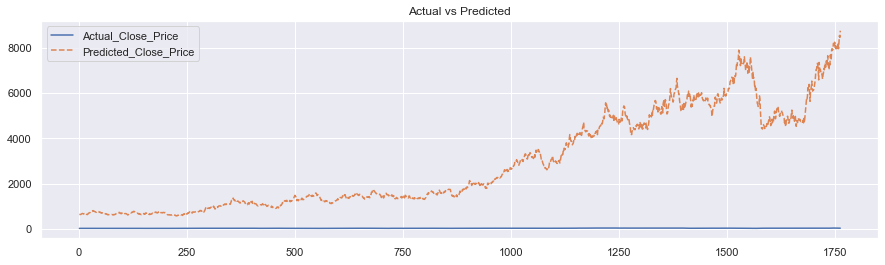

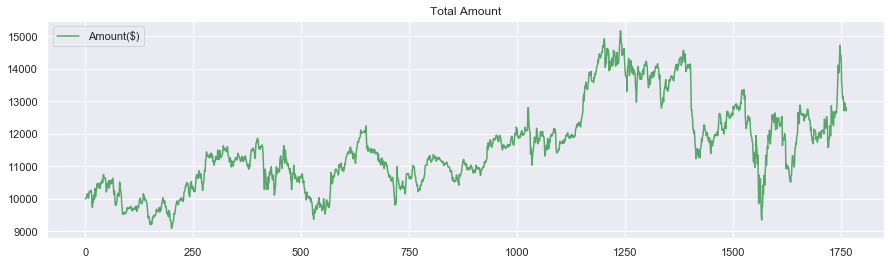

In [34]:
Strategy_Result[['Actual_Close_Price','Predicted_Close_Price']].loc[0:].plot(figsize=(15,4), 
                                                                             style=['-','--'], 
                                                                             title = 'Actual vs Predicted')


Strategy_Result[['Amount($)']].loc[0:].plot(figsize=(15,4), 
                                            style=['-g'], 
                                            title = 'Total Amount')

In [35]:
Profit = (Amount[-1])/10000
print('Initial_Investment : 10000$')
print('Final Amount:',Amount[-1],'$')      
print ('Profit_Percent:',Profit*100,'%')

Initial_Investment : 10000$
Final Amount: 12712.0 $
Profit_Percent: 127.12 %


In [36]:
rms = sqrt(mean_squared_error(Strategy_Result['Actual_Close_Price'], Strategy_Result['Predicted_Close_Price']))
rms

3563.340326736728